<a href="https://colab.research.google.com/github/renya1993/competition_practice_/blob/main/%E3%82%BF%E3%82%A4%E3%82%BF%E3%83%8B%E3%83%83%E3%82%AF%E3%82%B3%E3%83%B3%E3%83%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

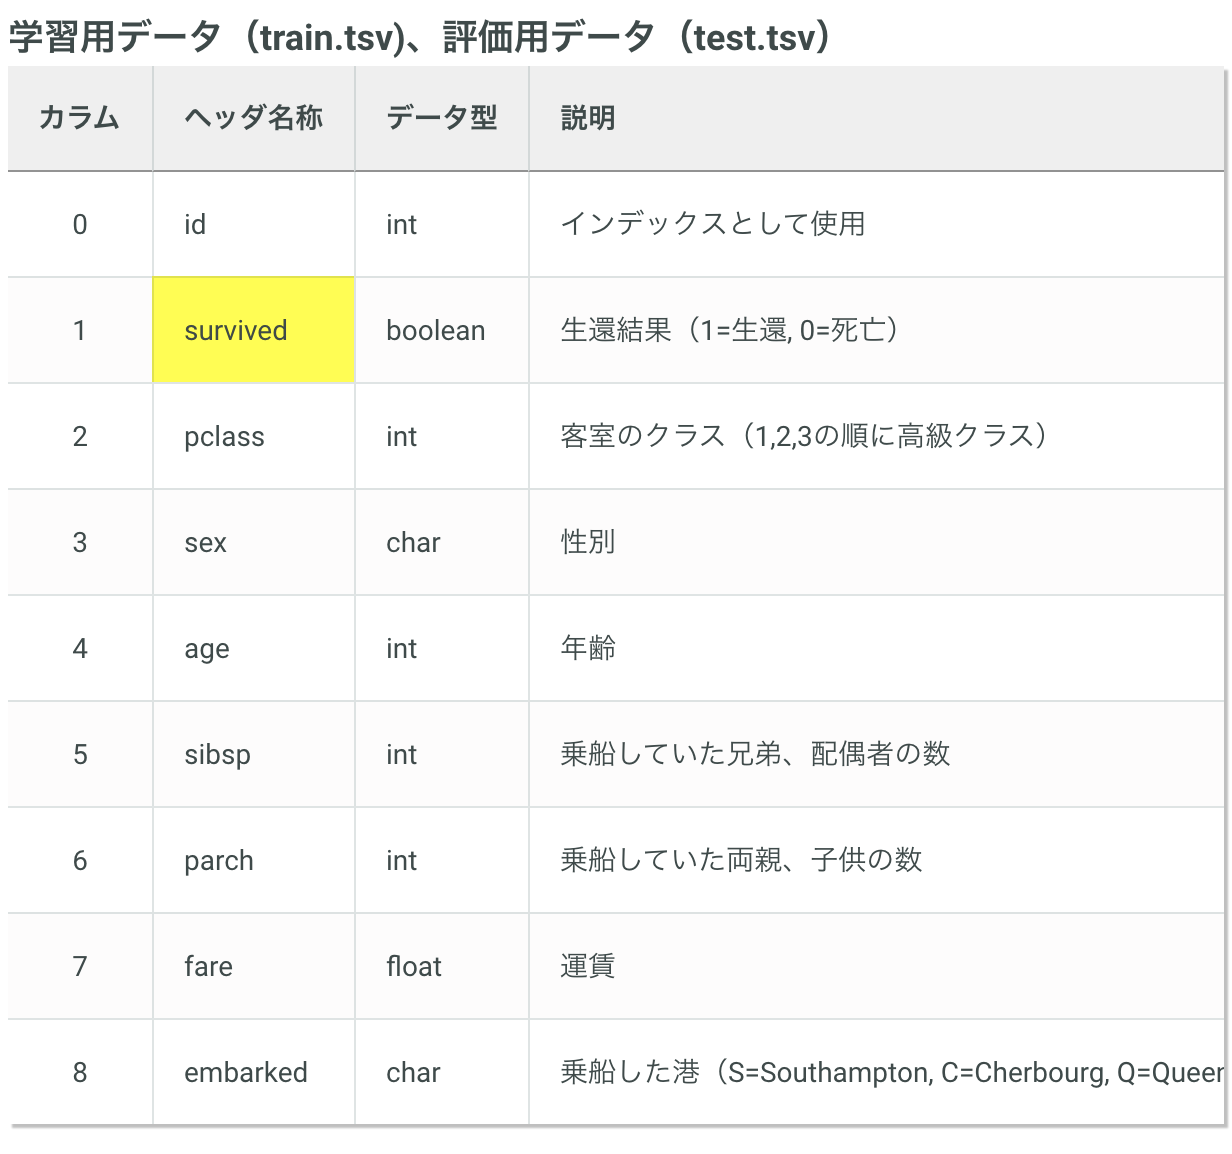

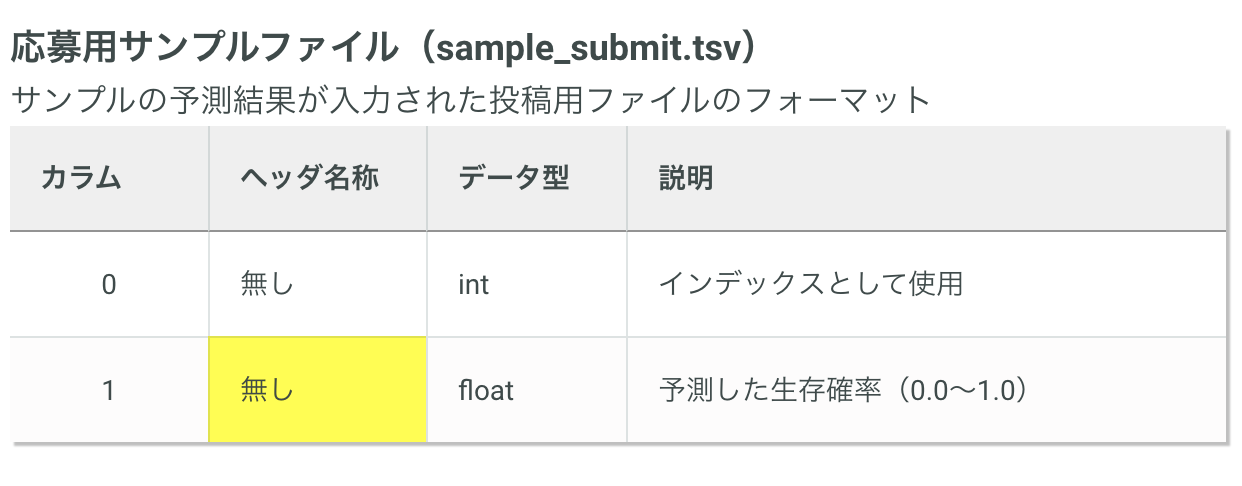

In [449]:
import numpy as np
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optimizers

In [450]:
import pandas as pd
train2 =pd.read_csv("/content/train _titanic.csv",index_col= 0)
print(train2.shape)
test = pd.read_csv("/content/drive/MyDrive/competition/titanic_signate/test.tsv",sep='\t',index_col= 0)
train =pd.read_csv("/content/drive/MyDrive/competition/titanic_signate/train.tsv",sep='\t',index_col= 0)
print(train.shape)
train2 = train2.drop(columns=["Name","Ticket","Cabin"])
train2 = train2.rename(columns={"Survived":"survived","Pclass":"pclass","Sex":"sex","Age":"age","SibSp":"sibsp","Parch":"parch","Fare":"fare","Embarked":"embarked",})
train = pd.concat([train,train2],ignore_index=True)
print(train.shape)

(891, 11)
(445, 8)
(1336, 8)


#欠損値を調べる

In [451]:
def display_missing(df):    
    for col in df.columns.tolist():          
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')
    

display_missing(train)

survived column missing values: 0
pclass column missing values: 0
sex column missing values: 0
age column missing values: 262
sibsp column missing values: 0
parch column missing values: 0
fare column missing values: 0
embarked column missing values: 4




In [452]:
train.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,35.0,1,0,53.1000,S
1,0,3,male,35.0,0,0,8.0500,S
2,0,3,male,2.0,3,1,21.0750,S
3,1,2,female,14.0,1,0,30.0708,C
4,1,1,female,58.0,0,0,26.5500,S
5,0,3,male,39.0,1,5,31.2750,S
6,0,3,male,2.0,4,1,29.1250,Q
7,1,3,female,NaN,0,0,7.2250,C
8,1,1,male,28.0,0,0,35.5000,S
9,0,3,female,8.0,3,1,21.0750,S


In [453]:
train

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,35.0,1,0,53.1000,S
1,0,3,male,35.0,0,0,8.0500,S
2,0,3,male,2.0,3,1,21.0750,S
3,1,2,female,14.0,1,0,30.0708,C
4,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
1331,0,2,male,27.0,0,0,13.0000,S
1332,1,1,female,19.0,0,0,30.0000,S
1333,0,3,female,NaN,1,2,23.4500,S
1334,1,1,male,26.0,0,0,30.0000,C


In [454]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,35.0,1,0,53.1000,S
1,0,3,male,35.0,0,0,8.0500,S
2,0,3,male,2.0,3,1,21.0750,S
3,1,2,female,14.0,1,0,30.0708,C
4,1,1,female,58.0,0,0,26.5500,S


In [455]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1336 entries, 0 to 1335
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1336 non-null   int64  
 1   pclass    1336 non-null   int64  
 2   sex       1336 non-null   object 
 3   age       1074 non-null   float64
 4   sibsp     1336 non-null   int64  
 5   parch     1336 non-null   int64  
 6   fare      1336 non-null   float64
 7   embarked  1332 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 83.6+ KB


## オブジェクト型をfloatに変更

In [456]:
df = pd.get_dummies(train)
df2 = pd.get_dummies(test)

df.corr()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
survived,1.000000,-0.345091,-0.078896,-0.038568,0.081394,0.257929,0.548618,-0.548618,0.172665,0.004161,-0.161180
pclass,-0.345091,1.000000,-0.346230,0.078316,0.006479,-0.549426,-0.152431,0.152431,-0.231543,0.231378,0.065894
age,-0.078896,-0.346230,1.000000,-0.300149,-0.177233,0.096375,-0.086512,0.086512,0.025856,-0.020817,-0.027210
sibsp,-0.038568,0.078316,-0.300149,1.000000,0.418041,0.161611,0.108651,-0.108651,-0.064772,-0.050558,0.091366
parch,0.081394,0.006479,-0.177233,0.418041,1.000000,0.225683,0.236490,-0.236490,-0.012582,-0.097774,0.075875
fare,0.257929,-0.549426,0.096375,0.161611,0.225683,1.000000,0.177636,-0.177636,0.252230,-0.127199,-0.145397
sex_female,0.548618,-0.152431,-0.086512,0.108651,0.236490,0.177636,1.000000,-1.000000,0.089259,0.067866,-0.129545
sex_male,-0.548618,0.152431,0.086512,-0.108651,-0.236490,-0.177636,-1.000000,1.000000,-0.089259,-0.067866,0.129545
embarked_C,0.172665,-0.231543,0.025856,-0.064772,-0.012582,0.252230,0.089259,-0.089259,1.000000,-0.146853,-0.773862
embarked_Q,0.004161,0.231378,-0.020817,-0.050558,-0.097774,-0.127199,0.067866,-0.067866,-0.146853,1.000000,-0.501046


fareと、sex、pclassが影響してそう

１つ１つ調べてみる
### embarkedで調べる

In [457]:
print("生存した人の数_embarked調べ")
print("embarked_C",df[df["survived"]==1][df["embarked_C"]==1].shape)
print("embarked_Q",df[df["survived"]==1][df["embarked_Q"]==1].shape)
print("embarked_S",df[df["survived"]==1][df["embarked_S"]==1].shape)

生存した人の数_embarked調べ
embarked_C (140, 11)
embarked_Q (46, 11)
embarked_S (331, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


これを見る限り、embarkedは関係ありそう

### sexで調べる

In [458]:
print("生存した人の数_sex調べ")
print("sex_female",df[df["survived"]==1][df["sex_female"]==1].shape)
print("sex_male",df[df["survived"]==1][df["sex_male"]==1].shape)

生存した人の数_sex調べ
sex_female (354, 11)
sex_male (167, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


これも関係ありそう

### fareで調べる

In [459]:
print("詳細情報")
df["fare"].describe()

詳細情報


count    1336.000000
mean       32.789024
std        50.487979
min         0.000000
25%         7.925000
50%        14.458300
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [460]:
print("生存した人の数_fare調べ")
print("sex_female",df[df["survived"]==1][df["fare"]>=33.959971].shape)
print("sex_female",df[df["survived"]==0][df["fare"]>=33.959971].shape)
print("sex_female",df[df["survived"]==1][df["fare"]<33.959971].shape)
print("sex_female",df[df["survived"]==0][df["fare"]<33.959971].shape)

生存した人の数_fare調べ
sex_female (192, 11)
sex_female (124, 11)
sex_female (329, 11)
sex_female (691, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


平均より多い方が生き残ってる率高い

###pclassで調べる

In [461]:
print("---------生存------------")
print("sex_female",df[df["survived"]==1][df["pclass"]==1].shape)
print("sex_female",df[df["survived"]==1][df["pclass"]==2].shape)
print("sex_female",df[df["survived"]==1][df["pclass"]==3].shape)

print("---------死亡------------")
print("sex_female",df[df["survived"]==0][df["pclass"]==1].shape)
print("sex_female",df[df["survived"]==0][df["pclass"]==2].shape)
print("sex_female",df[df["survived"]==0][df["pclass"]==3].shape)

---------生存------------
sex_female (210, 11)
sex_female (130, 11)
sex_female (181, 11)
---------死亡------------
sex_female (114, 11)
sex_female (151, 11)
sex_female (550, 11)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '_

pclassの1と3だけめっちゃ関係ありそう。
分ける必要あり

In [462]:
df["pclass_1"] = df[df["pclass"]==1]["pclass"]
df["pclass_1"] =df["pclass_1"].fillna(0.0)
df2["pclass_1"] = df2[df2["pclass"]==1]["pclass"]
df2["pclass_1"] =df2["pclass_1"].fillna(0.0)

In [463]:
#割り算して、1と0に分けてる
df["pclass_2"] = df[df["pclass"]==2]["pclass"]/2
df["pclass_2"] =df["pclass_2"].fillna(0.0)
df2["pclass_2"] = df2[df2["pclass"]==2]["pclass"]/2
df2["pclass_2"] =df2["pclass_2"].fillna(0.0)

In [464]:
df["pclass_3"] = df[df["pclass"]==3]["pclass"]/3
df["pclass_3"] =df["pclass_3"].fillna(0.0)
df2["pclass_3"] = df2[df["pclass"]==3]["pclass"]/3
df2["pclass_3"] =df2["pclass_3"].fillna(0.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [465]:
df

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,1,35.0,1,0,53.1000,1,0,0,0,1,1.0,0.0,0.0
1,0,3,35.0,0,0,8.0500,0,1,0,0,1,0.0,0.0,1.0
2,0,3,2.0,3,1,21.0750,0,1,0,0,1,0.0,0.0,1.0
3,1,2,14.0,1,0,30.0708,1,0,1,0,0,0.0,1.0,0.0
4,1,1,58.0,0,0,26.5500,1,0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,0,2,27.0,0,0,13.0000,0,1,0,0,1,0.0,1.0,0.0
1332,1,1,19.0,0,0,30.0000,1,0,0,0,1,1.0,0.0,0.0
1333,0,3,NaN,1,2,23.4500,1,0,0,0,1,0.0,0.0,1.0
1334,1,1,26.0,0,0,30.0000,0,1,1,0,0,1.0,0.0,0.0


#機械学習で欠損値ageを代入

In [466]:
train_lost_age =df.loc[df[df["age"].isnull()].index,:]
train_lost_age = train_lost_age.drop(columns="age")

train_have_age =df.loc[df[df["age"].isnull()==False].index,:]
train_have_age
train_lost_age

,survived,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
7,1,3,0,0,7.2250,1,0,1,0,0,0.0,0.0,1.0
11,0,3,0,0,7.2250,0,1,1,0,0,0.0,0.0,1.0
12,1,3,0,0,7.8792,1,0,0,1,0,0.0,0.0,1.0
13,0,3,0,0,7.8958,0,1,0,0,1,0.0,0.0,1.0
14,1,3,0,0,7.7500,1,0,0,1,0,0.0,0.0,1.0
16,1,3,0,0,7.2292,0,1,1,0,0,0.0,0.0,1.0
18,0,3,0,0,7.8958,0,1,1,0,0,0.0,0.0,1.0
21,1,3,0,0,7.7500,1,0,0,1,0,0.0,0.0,1.0
35,1,3,0,0,7.7875,1,0,0,1,0,0.0,0.0,1.0
39,0,3,0,0,8.0500,0,1,0,0,1,0.0,0.0,1.0


In [467]:
#ageをdrop、これが調べるデータとなる
train_lost_age_train = train_lost_age
train_lost_age_train

,survived,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
7,1,3,0,0,7.2250,1,0,1,0,0,0.0,0.0,1.0
11,0,3,0,0,7.2250,0,1,1,0,0,0.0,0.0,1.0
12,1,3,0,0,7.8792,1,0,0,1,0,0.0,0.0,1.0
13,0,3,0,0,7.8958,0,1,0,0,1,0.0,0.0,1.0
14,1,3,0,0,7.7500,1,0,0,1,0,0.0,0.0,1.0
16,1,3,0,0,7.2292,0,1,1,0,0,0.0,0.0,1.0
18,0,3,0,0,7.8958,0,1,1,0,0,0.0,0.0,1.0
21,1,3,0,0,7.7500,1,0,0,1,0,0.0,0.0,1.0
35,1,3,0,0,7.7875,1,0,0,1,0,0.0,0.0,1.0
39,0,3,0,0,8.0500,0,1,0,0,1,0.0,0.0,1.0


In [468]:
train_have_age_train = train_have_age.drop(columns="age")
train_have_age_test = train_have_age["age"]
train_have_age_train

,survived,pclass,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
0,1,1,1,0,53.1000,1,0,0,0,1,1.0,0.0,0.0
1,0,3,0,0,8.0500,0,1,0,0,1,0.0,0.0,1.0
2,0,3,3,1,21.0750,0,1,0,0,1,0.0,0.0,1.0
3,1,2,1,0,30.0708,1,0,1,0,0,0.0,1.0,0.0
4,1,1,0,0,26.5500,1,0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,0,3,0,5,29.1250,1,0,0,1,0,0.0,0.0,1.0
1331,0,2,0,0,13.0000,0,1,0,0,1,0.0,1.0,0.0
1332,1,1,0,0,30.0000,1,0,0,0,1,1.0,0.0,0.0
1334,1,1,0,0,30.0000,0,1,1,0,0,1.0,0.0,0.0


In [469]:
from sklearn.model_selection import train_test_split
x_train,x_test,t_train,t_test = train_test_split(train_have_age_train,train_have_age_test,test_size=0.2)

In [470]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor

#lr=LR()
lr=RandomForestRegressor(random_state=0,max_depth=30)

In [512]:
class MLP2(nn.Module):
  def __init__(self,input_dim,output_dim):
    super().__init__()
    self.l1 =nn.Linear(input_dim,2028)
    self.a1 =nn.Sigmoid()
    """
    追加
    """
    self.l2 =nn.Linear(2028,1024)
    self.a2 =nn.Sigmoid()
    self.l3 =nn.Linear(1024,512)
    self.a3 =nn.Sigmoid()
    self.l4 =nn.Linear(512,256)
    self.a4 =nn.Sigmoid()
    
    self.l5 =nn.Linear(256,128)
    self.a5 =nn.Sigmoid()
    self.l6 =nn.Linear(128,64)
    self.a6 =nn.Sigmoid()
    self.l7 =nn.Linear(64,32)
    self.a7 =nn.Sigmoid()
    self.l8=nn.Linear(32,16)
    self.a8 =nn.Sigmoid()
    self.l9 =nn.Linear(16,output_dim)
    self.a9 = nn.Sigmoid()

    self.layers = [self.l1,self.a1,self.l2,self.a2,self.l3,self.a3,self.l4,self.a4,self.l5,self.a5,self.l6,self.a6,self.l7,self.a7,self.l8,self.a8,self.l9,self.a9]

  def forward(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

In [513]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [514]:
model2 = MLP(train_have_age_train.shape[1],1).to(device)

In [471]:
lr.fit(x_train,t_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=30, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [472]:
from sklearn.metrics import mean_squared_error as MSE
pre_x_test = lr.predict(x_test) 
mse_test= MSE(t_test,pre_x_test)
rmse_test=np.sqrt(mse_test)
rmse_test

10.991397499351176

In [473]:
##次にモデルがうまく学習できているかを調べます。そのためには、学習データと、評価データ
#を比較する必要があります。
pre_x_train = lr.predict(x_train) 
mse_train =  MSE(t_train,pre_x_train)
rmse_train=np.sqrt(mse_train)

print("rmse_train",rmse_train)
print("rmse_test",rmse_test)
##trainの方が精度がいいことがわかります。

rmse_train 6.9200612366212155
rmse_test 10.991397499351176


In [474]:
pre_lost_test = lr.predict(train_lost_age) 
pre_lost_test.reshape(-1,1).shape
#出力完了

(262, 1)

In [ ]:
pre_lost_test_data =pd.DataFrame(pre_lost_test.reshape(-1))
pre_lost_test_data

In [476]:
pre_lost_test_data[0].values.shape

(262,)

In [477]:
#これを、データに入れ込む。
df.loc[df[df["age"].isnull()].index,"age"] = pre_lost_test_data[0].values


In [478]:
df["age"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1331    False
1332    False
1333    False
1334    False
1335    False
Name: age, Length: 1336, dtype: bool

In [479]:
df.loc[df[df["age"].isnull()].index,:]["age"]

Series([], Name: age, dtype: float64)

#どのカラムを選ぶかの選択

In [480]:
train = df.drop(columns="survived")

In [481]:
train_output = df["survived"]

## 訓練データの分割

In [482]:
from sklearn.model_selection import train_test_split

x_train,x_test,t_train,t_test = train_test_split(train,train_output,test_size=0.01)

In [483]:
x_train

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1,pclass_2,pclass_3
1255,3,26.000000,0,0,7.8875,0,1,0,0,1,0.0,0.0,1.0
289,3,37.508239,0,0,7.2250,0,1,1,0,0,0.0,0.0,1.0
384,3,37.508239,0,0,7.2250,0,1,1,0,0,0.0,0.0,1.0
902,1,38.086667,1,0,51.8625,1,0,0,0,1,1.0,0.0,0.0
40,1,23.000000,3,2,263.0000,1,0,0,0,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2,54.000000,0,0,26.0000,0,1,0,0,1,0.0,1.0,0.0
1087,3,2.000000,3,2,27.9000,1,0,0,0,1,0.0,0.0,1.0
37,2,17.000000,0,0,10.5000,1,0,0,0,1,0.0,1.0,0.0
192,2,34.000000,1,0,21.0000,0,1,0,0,1,0.0,1.0,0.0


In [484]:
x_train=x_train.values.reshape(-1,train.shape[1])
t_train=t_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,train.shape[1])
t_test=t_test.values.reshape(-1,1)

In [485]:
x_train.shape
t_train.shape

(1322, 1)

##pytorchで実装

#モデルの設定

In [498]:
class MLP(nn.Module):
  def __init__(self,input_dim,output_dim):
    super().__init__()
    self.l1 =nn.Linear(input_dim,2028)
    self.a1 =nn.Sigmoid()
    """
    追加
    """
    self.l2 =nn.Linear(2028,1024)
    self.a2 =nn.Sigmoid()
    self.l3 =nn.Linear(1024,512)
    self.a3 =nn.Sigmoid()
    self.l4 =nn.Linear(512,256)
    self.a4 =nn.Sigmoid()
    
    self.l5 =nn.Linear(256,128)
    self.a5 =nn.Sigmoid()
    self.l6 =nn.Linear(128,64)
    self.a6 =nn.Sigmoid()
    self.l7 =nn.Linear(64,32)
    self.a7 =nn.Sigmoid()
    self.l8=nn.Linear(32,16)
    self.a8 =nn.Sigmoid()
    self.l9 =nn.Linear(16,output_dim)
    self.a9 = nn.Sigmoid()

    self.layers = [self.l1,self.a1,self.l2,self.a2,self.l3,self.a3,self.l4,self.a4,self.l5,self.a5,self.l6,self.a6,self.l7,self.a7,self.l8,self.a8,self.l9,self.a9]

  def forward(self,x):
    for layer in self.layers:
      x = layer(x)
    return x

In [499]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [500]:
train.shape[1]

13

In [501]:
model = MLP(train.shape[1],1).to(device)

#損失関数、微分のやり方の設定

In [502]:
criterion = nn.BCELoss()

def compute_loss(t,y):
  return criterion(y,t)

optimizer = optimizers.Adam(model.parameters(),lr=0.005)

##訓練を司るもの

#学習

In [503]:
import matplotlib.pyplot as plt

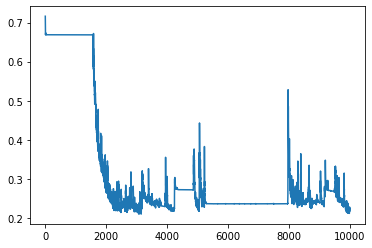

In [504]:
def train_step(x,t):
  model.train()
  preds = model(x)
  loss = compute_loss(t,preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  return loss

epochs = 10000
f= []
r= []
for epoch in range(epochs):
  
  train_loss =0
  x_ = torch.Tensor(x_train).to(device)
  t_ = torch.Tensor(t_train).to(device)
  x_t = torch.Tensor(x_test).to(device)
  t_t = torch.Tensor(t_test).to(device)
  loss = train_step(x_,t_).data.cpu().numpy()
  #loss2 = train_step(x_t,t_t).data.cpu().numpy()
  f.append(loss)
  #r.append(loss2)
  now_epoch=epoch
"""
  if epoch>300:
    if f[epoch-1]<f[epoch]+f[epoch]/20 and r[epoch-1]<r[epoch]+r[epoch]/20 :
      print(f[epoch])
      break

"""
plt.plot(np.arange(0,now_epoch+1,1),f)
#plt.plot(np.arange(0,now_epoch+1,1),r)

In [509]:
def test_step(x,t):
  x = torch.Tensor(x).to(device)
  t = torch.Tensor(t).to(device)
  model.eval()
  preds =model(x)
  loss = compute_loss(t,preds)
  return loss,preds

loss,preds = test_step(x_test,t_test)
loss2,preds2 = test_step(x_train,t_train)

test_loss = loss.item()
train_loss = loss2.item()
preds = preds.data.cpu().numpy() >0.5
preds2 = preds2.data.cpu().numpy() >0.5

test_acc = accuracy_score(t_test,preds)
test_acc_train = accuracy_score(t_train,preds2)

print(test_loss,test_acc)
print(train_loss,test_acc_train)
#df2 =df2.values.reshape(-1,train.shape[1])
test_data = torch.Tensor(df2).to(device)
preds_test =model(test_data)

0.09049659222364426 1.0
0.22336611151695251 0.9372163388804842


In [510]:
pd.set_option('display.max_rows', 450)

preds_test=pd.DataFrame(preds_test.data.cpu().numpy() >0.5)


In [511]:
preds_test[preds_test[0]==True]=1
preds_test[preds_test[0]==False]=0
preds_test

,0
0,0
1,1
2,1
3,0
4,0
5,1
6,1
7,0
8,0
9,1
